<a href="https://colab.research.google.com/github/hania-amr/Lyrics_analysis/blob/main/deepLearning_lyricsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import nltk
from tabulate import tabulate
from IPython.core.display import display, HTML
from scipy.stats import skewnorm, gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from tqdm import tqdm
import torch
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import umap
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
import logging
from torch.utils.data import DataLoader

In [5]:
data = pd.read_csv('/content/fayrouz_lyrics - Sheet1.csv')
data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ©  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ© .. ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤Ÿäÿ© ÿ®ÿ≠ÿ®ŸÉ ŸÖŸÜ ŸÇŸÑÿ®Ÿä .. Ÿä...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿ¢ÿÆÿ± ÿ£ŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäÿ© ŸàÿßŸÑÿµÿ®Ÿäÿ© ÿ¥ŸàŸä ÿ¥ŸàŸä ŸàÿµŸÑÿ™ ÿπ ÿ≥ÿßÿ≠ÿ© ŸÖ...   
2       ÿßÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä  ÿ£ÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ Ÿàÿ£ŸÜŸäŸÜ ÿßŸÑŸÜÿßŸä Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä  ÿ£ŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä Ÿà ÿ≠ÿ®Ÿäÿ®Ÿä ÿ•ŸÑŸä Ÿäÿß ÿπÿµŸÅŸàÿ±ÿ© ÿ®Ÿäÿ∂ÿß ŸÑÿß ÿ®ŸÇŸâ ÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿπ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ .. ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸä...   

   Release Year       composer           Lyricist  
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´  
1        1975.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ  
3        1965.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
4        1961.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(data.shape[0])
print(data.shape[1])
print(data.columns.tolist())

109
5
['Track title', 'track lyrics', 'Release Year', 'composer ', 'Lyricist']


In [8]:
before_dedup = data.shape[0]
data = data.drop_duplicates()
after_dedup = data.shape[0]

print(f"Number of songs before removing duplicates: {before_dedup}")
print(f"Number of songs after removing duplicates: {after_dedup}")
print(f"Number of duplicates removed: {before_dedup - after_dedup}")


Number of songs before removing duplicates: 109
Number of songs after removing duplicates: 105
Number of duplicates removed: 4


In [9]:
data = data.drop_duplicates(subset=['Track title', 'track lyrics'])

In [10]:
track_lyrics_df = data['track lyrics'].to_frame()
print(track_lyrics_df.head())

                                        track lyrics
0  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ© .. ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤Ÿäÿ© ÿ®ÿ≠ÿ®ŸÉ ŸÖŸÜ ŸÇŸÑÿ®Ÿä .. Ÿä...
1  ÿ¢ÿÆÿ± ÿ£ŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäÿ© ŸàÿßŸÑÿµÿ®Ÿäÿ© ÿ¥ŸàŸä ÿ¥ŸàŸä ŸàÿµŸÑÿ™ ÿπ ÿ≥ÿßÿ≠ÿ© ŸÖ...
2  ÿ£ÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ Ÿàÿ£ŸÜŸäŸÜ ÿßŸÑŸÜÿßŸä Ÿä...
3  ÿ£ŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä Ÿà ÿ≠ÿ®Ÿäÿ®Ÿä ÿ•ŸÑŸä Ÿäÿß ÿπÿµŸÅŸàÿ±ÿ© ÿ®Ÿäÿ∂ÿß ŸÑÿß ÿ®ŸÇŸâ ÿ™...
4  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿπ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ .. ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸä...


In [11]:
#removing all punctuation and special characters
data['track lyrics'] = data['track lyrics'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ©  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ©  ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤Ÿäÿ© ÿ®ÿ≠ÿ®ŸÉ ŸÖŸÜ ŸÇŸÑÿ®Ÿä  ŸäÿßŸÇŸÑÿ®...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿ¢ÿÆÿ± ÿ£ŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäÿ© ŸàÿßŸÑÿµÿ®Ÿäÿ© ÿ¥ŸàŸä ÿ¥ŸàŸä ŸàÿµŸÑÿ™ ÿπ ÿ≥ÿßÿ≠ÿ© ŸÖ...   
2       ÿßÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä  ÿ£ÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ Ÿàÿ£ŸÜŸäŸÜ ÿßŸÑŸÜÿßŸä Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä  ÿ£ŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä Ÿà ÿ≠ÿ®Ÿäÿ®Ÿä ÿ•ŸÑŸä Ÿäÿß ÿπÿµŸÅŸàÿ±ÿ© ÿ®Ÿäÿ∂ÿß ŸÑÿß ÿ®ŸÇŸâ ÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿπ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ  ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸä Ÿä...   

   Release Year       composer           Lyricist  
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´  
1        1975.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ  
3        1965.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
4        1961.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä

In [12]:
import re
import pandas as pd

# Function to strip punctuation characters
def clean_punctuation(text):
    text = str(text)
    return re.sub(r'[^\w\s]', '', text)

# Function to normalize line breaks and carriage returns
def normalize_whitespace(text):
    text = str(text)
    return text.replace('\n', ' ').replace('\r', '')

# Function to remove Arabic diacritic marks
def strip_arabic_diacritics(text):
    text = str(text)
    diacritics_pattern = re.compile(r"""
        [ŸëŸéŸãŸèŸåŸêŸçŸíŸÄ~]  # Arabic vowel marks, sukun, and tatwil
    """, re.VERBOSE)
    return re.sub(diacritics_pattern, '', text)

data['track lyrics'] = data['track lyrics'].apply(clean_punctuation)
data['track lyrics'] = data['track lyrics'].apply(normalize_whitespace)
data['track lyrics'] = data['track lyrics'].apply(strip_arabic_diacritics)
data['Track title'] = data['Track title'].apply(clean_punctuation)
data['Track title'] = data['Track title'].apply(normalize_whitespace)
data['Track title'] = data['Track title'].apply(strip_arabic_diacritics)

data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ©  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®Ÿäÿ©  ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤Ÿäÿ© ÿ®ÿ≠ÿ®ŸÉ ŸÖŸÜ ŸÇŸÑÿ®Ÿä  ŸäÿßŸÇŸÑÿ®...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿ¢ÿÆÿ± ÿ£ŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäÿ© ŸàÿßŸÑÿµÿ®Ÿäÿ© ÿ¥ŸàŸä ÿ¥ŸàŸä ŸàÿµŸÑÿ™ ÿπ ÿ≥ÿßÿ≠ÿ© ŸÖ...   
2       ÿßÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä  ÿ£ÿπÿ∑ŸÜŸä ÿßŸÑŸÜÿßŸä Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ Ÿàÿ£ŸÜŸäŸÜ ÿßŸÑŸÜÿßŸä Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä  ÿ£ŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿä Ÿà ÿ≠ÿ®Ÿäÿ®Ÿä ÿ•ŸÑŸä Ÿäÿß ÿπÿµŸÅŸàÿ±ÿ© ÿ®Ÿäÿ∂ÿß ŸÑÿß ÿ®ŸÇŸâ ÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿπ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ  ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸä Ÿä...   

   Release Year       composer           Lyricist  
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´  
1        1975.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ  
3        1965.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
4        1961.0  ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä

In [13]:
def standardizing_arabic_text(text):
    text = re.sub(r'Ÿä\b', 'Ÿâ', text)
    text = text.replace('ÿ£', 'ÿß')
    text = text.replace('ÿ¢', 'ÿß')
    text = re.sub(r'\bÿ•', 'ÿß', text)
    text = re.sub(r'ÿ©\b', 'Ÿá', text)
    return text

data['track lyrics'] = data['track lyrics'].apply(standardizing_arabic_text)
data['Track title'] = data['Track title'].apply(standardizing_arabic_text)
data['composer ']= data['composer '].apply(standardizing_arabic_text)

data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá  ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤ŸäŸá ÿ®ÿ≠ÿ®ŸÉ ŸÖŸÜ ŸÇŸÑÿ®Ÿâ  ŸäÿßŸÇŸÑÿ®...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá ŸàÿßŸÑÿµÿ®ŸäŸá ÿ¥ŸàŸâ ÿ¥ŸàŸâ ŸàÿµŸÑÿ™ ÿπ ÿ≥ÿßÿ≠Ÿá ŸÖ...   
2       ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ  ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ ŸàÿßŸÜŸäŸÜ ÿßŸÑŸÜÿßŸâ Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ  ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ Ÿà ÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑŸâ Ÿäÿß ÿπÿµŸÅŸàÿ±Ÿá ÿ®Ÿäÿ∂ÿß ŸÑÿß ÿ®ŸÇŸâ ÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿâ ÿπ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ  ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸâ Ÿä...   

   Release Year       composer           Lyricist  
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´  
1        1975.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ  
3        1965.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
4        1961.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä

In [14]:
def clean_name(name):
    if isinstance(name, str):
        return ' '.join(name.strip().split())
    return name

data['composer '] = data['composer '].apply(clean_name)

In [15]:
total_words_with = data['track lyrics'].apply(lambda x: len(x.split())).sum()
print(f'number of words with stopwords: {total_words_with}')

number of words with stopwords: 7462


In [16]:
words_before = data['track lyrics'].apply(lambda x: x.split()).explode()

In [17]:
stop_words = set(stopwords.words('arabic'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['track lyrics'] = data['track lyrics'].apply(remove_stopwords)
data['Track title'] = data['Track title'].apply(remove_stopwords)
data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤ŸäŸá ÿ®ÿ≠ÿ®ŸÉ ŸÇŸÑÿ®Ÿâ ŸäÿßŸÇŸÑÿ®Ÿâ ÿßŸÜÿ™...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá ŸàÿßŸÑÿµÿ®ŸäŸá ÿ¥ŸàŸâ ÿ¥ŸàŸâ ŸàÿµŸÑÿ™ ÿ≥ÿßÿ≠Ÿá ŸÖŸäÿ≥...   
2       ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ  ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ ŸàÿßŸÜŸäŸÜ ÿßŸÑŸÜÿßŸâ Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ  ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑŸâ ÿπÿµŸÅŸàÿ±Ÿá ÿ®Ÿäÿ∂ÿß ÿ®ŸÇŸâ ÿ™ÿ≥ÿßŸÑŸâ Ÿäÿπÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸâ ÿ≠ÿ®Ÿäÿ®...   

   Release Year       composer           Lyricist  
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´  
1        1975.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ  
3        1965.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  
4        1961.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä

In [18]:
total_words_without = data['track lyrics'].apply(lambda x: len(x.split())).sum()
print(f'number of words after removing stopwords: {total_words_without}')

number of words after removing stopwords: 6203


In [19]:
words_after = data['track lyrics'].apply(lambda x: x.split()).explode()

In [20]:
eliminated_words = words_before[~words_before.isin(words_after)]
print(f'Total number of eliminated words: {len(eliminated_words)}')
print(f'Eliminated words: {eliminated_words.tolist()}')

Total number of eliminated words: 1259
Eliminated words: ['ŸÖŸÜ', 'Ÿà', 'Ÿà', 'ÿ™ÿ≠ÿ™', 'Ÿà', 'Ÿäÿß', 'Ÿà', 'ÿπ', 'ŸÅŸäŸáÿß', 'ŸÑŸà', 'ŸÖÿß', 'ÿ®ÿπÿØ', 'ŸáŸÑ', 'ÿØŸàŸÜ', 'ŸáŸÑ', 'ŸÖŸÜ', 'ŸÖŸÜ', 'ŸáŸÑ', 'ÿ®ŸäŸÜ', 'ŸáŸÑ', 'ŸÖÿß', 'ŸÖÿß', 'ŸÇÿØ', 'ŸÑŸÉŸÜ', 'Ÿà', 'Ÿäÿß', 'ŸÑÿß', 'ŸÑÿß', 'Ÿà', 'ŸÑÿß', 'Ÿà', 'ÿ±ÿßÿ≠', 'Ÿà', 'ÿπŸÑŸâ', 'Ÿà', 'Ÿà', 'Ÿà', 'Ÿà', 'ŸÖŸÜ', 'ŸÖŸÜ', 'Ÿà', 'Ÿäÿß', 'ÿπ', 'Ÿäÿß', 'ÿπ', 'ÿπ', 'Ÿäÿß', 'ÿ™ÿ≠ÿ™', 'ÿπ', 'ŸÑÿß', 'ŸàŸÑÿß', 'ŸÅŸäŸáÿß', 'ŸÖÿß', 'ÿπ', 'Ÿäÿß', 'ÿπ', 'Ÿà', 'Ÿäÿß', 'Ÿà', 'ÿπŸÑŸâ', 'Ÿäÿß', 'Ÿà', 'Ÿà', 'Ÿà', 'Ÿà', 'ŸÖÿß', 'ÿπŸÑŸâ', 'Ÿà', 'Ÿà', 'ŸÖÿß', 'ŸÉÿßŸÜ', 'ÿπ', 'ÿπ', 'ŸÉŸÑ', 'ŸÖÿß', 'ŸÉŸÑ', 'ŸÖÿß', 'ŸÖŸÜ', 'ŸÉÿßŸÜ', 'ŸÖŸÜ', 'ŸÉÿßŸÜ', 'ÿ≥ŸàŸâ', 'ÿπŸÑŸâ', 'ÿπŸÑŸâ', 'ŸÖŸÜ', 'ÿπŸÑŸâ', 'ÿπŸÑŸâ', 'ŸÑŸá', 'Ÿäÿß', 'ŸÑŸá', 'ŸàŸÖÿß', 'ŸàŸÖŸÜ', 'ŸÖÿß', 'ÿπÿ¥ÿ±ŸäŸÜ', 'Ÿäÿß', 'Ÿäÿß', 'ÿπ', 'ÿπŸÑŸâ', 'ÿπŸÑŸâ', 'ŸÅŸàŸÇ', 'ÿπ', 'ŸÉÿßŸÜ', 'ÿπŸÑŸâ', 'ŸÑŸà', 'ŸÖÿπ', 'Ÿáÿß', 'ÿ®ÿπÿØ', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿäÿß', 'Ÿ

In [21]:
data['Tokenized & Preprocessed Lyrics'] = data['track lyrics'].apply(lambda x: x.split())
data['Tokenized & Preprocessed Lyrics'] = data['Tokenized & Preprocessed Lyrics'].apply(lambda x: '\n'.join(x))

print(data[['Track title', 'track lyrics', 'Tokenized & Preprocessed Lyrics']].head())

data.to_csv('fayrouz_lyrics_tokenized.csv', index=False, encoding='utf-8-sig')

        Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤ŸäŸá ÿ®ÿ≠ÿ®ŸÉ ŸÇŸÑÿ®Ÿâ ŸäÿßŸÇŸÑÿ®Ÿâ ÿßŸÜÿ™...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá ŸàÿßŸÑÿµÿ®ŸäŸá ÿ¥ŸàŸâ ÿ¥ŸàŸâ ŸàÿµŸÑÿ™ ÿ≥ÿßÿ≠Ÿá ŸÖŸäÿ≥...   
2       ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ  ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ ŸàÿßŸÜŸäŸÜ ÿßŸÑŸÜÿßŸâ Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ  ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑŸâ ÿπÿµŸÅŸàÿ±Ÿá ÿ®Ÿäÿ∂ÿß ÿ®ŸÇŸâ ÿ™ÿ≥ÿßŸÑŸâ Ÿäÿπÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸâ ÿ≠ÿ®Ÿäÿ®...   

                     Tokenized & Preprocessed Lyrics  
0  ÿßŸÑÿ®ŸÜÿ™\nÿßŸÑÿ¥ŸÑÿ®ŸäŸá\nÿπŸäŸàŸÜÿß\nŸÑŸàÿ≤ŸäŸá\nÿ®ÿ≠ÿ®ŸÉ\nŸÇŸÑÿ®Ÿâ\nŸäÿßŸÇŸÑ...  
1  ÿßÿÆÿ±\nÿßŸäÿßŸÖ\nÿßŸÑÿµŸäŸÅŸäŸá\nŸàÿßŸÑÿµÿ®ŸäŸá\nÿ¥ŸàŸâ\nÿ¥ŸàŸâ\nŸàÿµŸÑÿ™\nÿ≥...  
2  ÿßÿπÿ∑ŸÜŸâ\nÿßŸÑŸÜÿßŸâ\nŸàÿ∫ŸÜ\nŸÅÿßŸÑÿ∫ŸÜÿß\nÿ≥ÿ±\nÿßŸÑŸàÿ¨ŸàÿØ\nŸàÿßŸÜŸäŸÜ

In [22]:
print(data.columns)

Index(['Track title', 'track lyrics', 'Release Year', 'composer ', 'Lyricist',
       'Tokenized & Preprocessed Lyrics'],
      dtype='object')


In [23]:
keyword = "ÿ≠ÿ®Ÿäÿ®Ÿâ"
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)]

print(filtered_songs['Track title'])

1     ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá
3           ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ
4            ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ
6          ÿ≥ÿßŸÑÿ™ŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ
20         ÿßÿ≠ŸÉŸäŸÑŸâ ÿ®ŸÑÿØŸâ
22         ÿßÿÆÿ± ÿßŸÑÿ≥Ÿáÿ±ŸäŸá
23     ÿßÿ∞ÿß ÿßŸÑÿßÿ±ÿ∂ ŸÖÿØŸàÿ±Ÿá
24             ÿßÿ∞ŸÉÿ±ŸäŸÜŸâ
28         ÿ®ÿ®ŸÑÿØŸâ ÿßŸÑÿßŸàŸÑ
30           ÿ®ÿπÿ´ÿ™ ÿ±Ÿàÿ≠Ÿâ
40             ÿ¨ÿßŸâ ÿßŸÜÿß
43     ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ®ÿØŸá ÿßŸÑŸÇŸÖÿ±
49      ÿ™ÿπÿßŸÑ ŸÉŸÅÿßŸÉ ÿØŸÑÿßŸÑ
54             ÿ∫ÿ±ÿ® ŸáŸàŸâ
55                 nan
56        ÿ≥ÿßŸÑŸàŸÜŸâ ÿßŸÑŸÜÿßÿ≥
57      ÿ≤Ÿàÿ±ŸàŸÜŸâ ÿ≥ŸÜŸá ŸÖÿ±Ÿá
63           ŸÅÿßŸäŸÇ ŸÜÿßÿ≥Ÿâ
65     ŸÜÿ≥ŸÖ ÿπŸÑŸäŸÜÿß ÿßŸÑŸáŸàŸâ
69          ÿ±ÿßÿ¨ÿπŸäŸÜ ŸáŸàŸâ
72          ŸÖÿπÿ±ŸÅÿ™Ÿâ ŸÅŸäŸÉ
73           ŸÖÿπŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ
77       ŸÜÿ≥Ÿäÿ™ŸÜÿß ÿßŸÑŸÉÿ±ŸàŸÖ
85           Ÿäÿ±ŸäÿØ ÿ≤Ÿáÿ±Ÿá
86        ÿ±ÿπŸäÿßŸÜ ÿßŸÑÿ¨ÿ®ÿßŸÑ
Name: Track title, dtype: object


In [24]:
keyword = "ŸÇŸÖÿ±"
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)]

print(filtered_songs['Track title'])

12            ÿßÿ®ŸÜŸá ÿ®ŸÑÿßÿØŸâ
16          ÿßÿ≠ÿ®ŸÉ ŸÅŸâ ÿµŸÖÿ™Ÿâ
23       ÿßÿ∞ÿß ÿßŸÑÿßÿ±ÿ∂ ŸÖÿØŸàÿ±Ÿá
24               ÿßÿ∞ŸÉÿ±ŸäŸÜŸâ
37              ÿ™ÿ®ŸÇŸâ ŸÖŸäŸÑ
38      ÿ™ŸÉ ÿ™ŸÉ ŸäÿßŸÖ ÿ≥ŸÑŸäŸÖÿßŸÜ
43       ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ®ÿØŸá ÿßŸÑŸÇŸÖÿ±
46                 ÿ™ÿÆŸÖŸäŸÜ
47         ÿ™ÿØŸàÿ± ÿßŸÑÿßÿ±ÿ¨ŸäŸÑŸá
52               ÿ∫Ÿäÿ® ŸÇŸÖÿ±
63             ŸÅÿßŸäŸÇ ŸÜÿßÿ≥Ÿâ
64              ŸÅÿßŸäŸÇ ŸáŸàŸâ
66     ŸÜÿ≠ŸÜÿß ŸàÿßŸÑŸÇŸÖÿ± ÿ¨Ÿäÿ±ÿßŸÜ
73             ŸÖÿπŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ
74         ÿ±Ÿàÿßÿ®ŸäŸÜÿß ÿßŸÑŸÇŸÖÿ±
77         ŸÜÿ≥Ÿäÿ™ŸÜÿß ÿßŸÑŸÉÿ±ŸàŸÖ
79           Ÿäÿßÿ≠ŸÑŸà ŸäÿßŸÇŸÖÿ±
81          ŸäÿßŸÇŸÖÿ± ÿØÿßÿ±ÿ™ŸÜÿß
82        ŸäÿßŸÇŸÖÿ± ŸÑÿ¥Ÿà ÿ™ÿ∑ŸÑÿπ
86          ÿ±ÿπŸäÿßŸÜ ÿßŸÑÿ¨ÿ®ÿßŸÑ
100                ÿßŸáŸàÿßŸÉ
103            ÿ≥ŸäÿØ ÿßŸÑŸáŸàŸâ
108              ÿπÿ™ŸÖ ŸÑŸäŸÑ
Name: Track title, dtype: object


In [25]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm

dataset_path = '/content/fayrouz_lyrics_tokenized.csv'
print(f"Attempting to read dataset: {dataset_path}")
try:
    lyrics_df = pd.read_csv(dataset_path)
    print(f"Successfully loaded lyrics. Number of entries: {len(lyrics_df)}")
except FileNotFoundError:
    print(f"Error: Cannot locate file '{dataset_path}'")
    raise

model_id = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
print(f"Initializing sentiment model: {model_id}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForSequenceClassification.from_pretrained(model_id)
    sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    print("Model and tokenizer loaded successfully.")
except Exception as error:
    print(f"Model loading failed: {error}")
    print("Ensure you're using compatible `transformers` version or switch to 'aubmindlab/bert-base-arabertv2'.")
    raise

# Function to evaluate sentiment from lyrics
def evaluate_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        print("Warning: Empty or malformed text detected. Defaulting to 'neutral'.")
        return "neutral", 0.0
    try:
        analysis = sentiment_analyzer(text, truncation=True, max_length=512)
        label = analysis[0]['label']
        confidence = analysis[0]['score']
        print(f"Sentiment identified: {label} (Confidence: {confidence:.2f})")
        return label, confidence
    except Exception as err:
        print(f"Error during sentiment prediction: {err}")
        return "neutral", 0.0

def classify_emotion(text, sentiment_label):
    keyword_mapping = {
        'love': ['ÿ≠ÿ®', 'ÿπÿ¥ŸÇ', 'ŸÇŸÑÿ®', 'ÿ≠ÿ®ÿßŸäÿ®'],
        'sadness': ['ÿØŸÖŸàÿπ', 'ŸÅÿ±ŸÇÿ©', 'ÿ∫Ÿäÿßÿ®', 'ÿ≠ÿ≤ŸÜ'],
        'longing': ['ÿ¥ŸàŸÇ', 'ŸÑŸäŸÑ', 'ÿ≠ŸÜŸäŸÜ'],
        'joy': ['ŸÅÿ±ÿ≠', 'ÿ≥ÿπÿßÿØÿ©', 'ŸÜŸàÿ±']
    }

    processed_text = text.lower() if isinstance(text, str) else ""
    for emotion, terms in keyword_mapping.items():
        if any(term in processed_text for term in terms):
            print(f"Emotion '{emotion}' matched based on keyword.")
            return emotion

    fallback_emotion = {
        'positive': 'joy',
        'negative': 'sadness',
        'neutral': 'neutral'
    }.get(sentiment_label, 'neutral')

    print(f"No emotion keyword matched. Defaulting to '{fallback_emotion}' based on sentiment.")
    return fallback_emotion

print("Running sentiment and emotion classification...")
tqdm.pandas()
lyrics_column = 'Tokenized & Preprocessed Lyrics'
lyrics_df['Sentiment'], lyrics_df['Sentiment_Score'] = zip(*lyrics_df[lyrics_column].progress_apply(evaluate_sentiment))
lyrics_df['Emotion'] = lyrics_df.apply(lambda row: classify_emotion(row[lyrics_column], row['Sentiment']), axis=1)

output_file = 'fayrouz_lyrics_with_sentiment.csv'
lyrics_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Analysis complete. Output saved to '{output_file}'.")

Attempting to read dataset: /content/fayrouz_lyrics_tokenized.csv
Successfully loaded lyrics. Number of entries: 104
Initializing sentiment model: CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment


Device set to use cpu


Model and tokenizer loaded successfully.
Running sentiment and emotion classification...


  2%|‚ñè         | 2/104 [00:00<00:16,  6.14it/s]

Sentiment identified: positive (Confidence: 0.65)


  3%|‚ñé         | 3/104 [00:00<00:24,  4.14it/s]

Sentiment identified: negative (Confidence: 0.94)


  4%|‚ñç         | 4/104 [00:01<00:32,  3.04it/s]

Sentiment identified: positive (Confidence: 0.59)


  5%|‚ñç         | 5/104 [00:01<00:34,  2.90it/s]

Sentiment identified: positive (Confidence: 0.95)


  6%|‚ñå         | 6/104 [00:02<00:41,  2.36it/s]

Sentiment identified: negative (Confidence: 0.71)


  7%|‚ñã         | 7/104 [00:02<00:36,  2.68it/s]

Sentiment identified: negative (Confidence: 0.69)


  8%|‚ñä         | 8/104 [00:02<00:38,  2.50it/s]

Sentiment identified: negative (Confidence: 0.70)


  9%|‚ñä         | 9/104 [00:03<00:41,  2.30it/s]

Sentiment identified: negative (Confidence: 0.97)


 10%|‚ñâ         | 10/104 [00:03<00:40,  2.34it/s]

Sentiment identified: negative (Confidence: 0.84)


 11%|‚ñà         | 11/104 [00:04<00:45,  2.05it/s]

Sentiment identified: positive (Confidence: 0.95)


 12%|‚ñà‚ñè        | 12/104 [00:04<00:41,  2.22it/s]

Sentiment identified: negative (Confidence: 0.83)


 12%|‚ñà‚ñé        | 13/104 [00:05<00:39,  2.30it/s]

Sentiment identified: positive (Confidence: 0.97)


 13%|‚ñà‚ñé        | 14/104 [00:06<00:55,  1.62it/s]

Sentiment identified: positive (Confidence: 0.88)


 14%|‚ñà‚ñç        | 15/104 [00:07<01:08,  1.30it/s]

Sentiment identified: negative (Confidence: 0.96)


 15%|‚ñà‚ñå        | 16/104 [00:13<03:21,  2.28s/it]

Sentiment identified: neutral (Confidence: 0.48)


 16%|‚ñà‚ñã        | 17/104 [00:13<02:29,  1.71s/it]

Sentiment identified: positive (Confidence: 0.99)


 17%|‚ñà‚ñã        | 18/104 [00:14<01:58,  1.38s/it]

Sentiment identified: positive (Confidence: 0.81)


 18%|‚ñà‚ñä        | 19/104 [00:14<01:32,  1.09s/it]

Sentiment identified: positive (Confidence: 0.62)


 19%|‚ñà‚ñâ        | 20/104 [00:15<01:16,  1.10it/s]

Sentiment identified: negative (Confidence: 0.96)


 20%|‚ñà‚ñà        | 21/104 [00:15<01:00,  1.36it/s]

Sentiment identified: positive (Confidence: 0.89)


 21%|‚ñà‚ñà        | 22/104 [00:15<00:54,  1.50it/s]

Sentiment identified: negative (Confidence: 0.62)


 22%|‚ñà‚ñà‚ñè       | 23/104 [00:16<00:45,  1.80it/s]

Sentiment identified: positive (Confidence: 0.53)


 23%|‚ñà‚ñà‚ñé       | 24/104 [00:16<00:42,  1.86it/s]

Sentiment identified: negative (Confidence: 0.87)


 24%|‚ñà‚ñà‚ñç       | 25/104 [00:16<00:34,  2.27it/s]

Sentiment identified: negative (Confidence: 0.41)


 25%|‚ñà‚ñà‚ñå       | 26/104 [00:17<00:36,  2.13it/s]

Sentiment identified: positive (Confidence: 0.83)


 26%|‚ñà‚ñà‚ñå       | 27/104 [00:17<00:29,  2.57it/s]

Sentiment identified: negative (Confidence: 0.86)


 27%|‚ñà‚ñà‚ñã       | 28/104 [00:18<00:33,  2.24it/s]

Sentiment identified: positive (Confidence: 0.78)


 28%|‚ñà‚ñà‚ñä       | 29/104 [00:18<00:33,  2.24it/s]

Sentiment identified: negative (Confidence: 0.65)


 29%|‚ñà‚ñà‚ñâ       | 30/104 [00:19<00:42,  1.74it/s]

Sentiment identified: positive (Confidence: 0.78)


 30%|‚ñà‚ñà‚ñâ       | 31/104 [00:19<00:36,  2.01it/s]

Sentiment identified: positive (Confidence: 0.99)


 31%|‚ñà‚ñà‚ñà       | 32/104 [00:20<00:29,  2.41it/s]

Sentiment identified: neutral (Confidence: 0.46)


 32%|‚ñà‚ñà‚ñà‚ñè      | 33/104 [00:20<00:26,  2.66it/s]

Sentiment identified: positive (Confidence: 0.63)


 33%|‚ñà‚ñà‚ñà‚ñé      | 34/104 [00:20<00:27,  2.53it/s]

Sentiment identified: negative (Confidence: 0.91)


 34%|‚ñà‚ñà‚ñà‚ñé      | 35/104 [00:21<00:33,  2.05it/s]

Sentiment identified: positive (Confidence: 0.66)


 35%|‚ñà‚ñà‚ñà‚ñç      | 36/104 [00:22<00:34,  1.97it/s]

Sentiment identified: positive (Confidence: 0.98)


 36%|‚ñà‚ñà‚ñà‚ñå      | 37/104 [00:22<00:35,  1.88it/s]

Sentiment identified: negative (Confidence: 0.68)


 37%|‚ñà‚ñà‚ñà‚ñã      | 38/104 [00:23<00:37,  1.78it/s]

Sentiment identified: negative (Confidence: 0.77)


 38%|‚ñà‚ñà‚ñà‚ñä      | 39/104 [00:23<00:39,  1.63it/s]

Sentiment identified: negative (Confidence: 0.99)


 38%|‚ñà‚ñà‚ñà‚ñä      | 40/104 [00:24<00:42,  1.50it/s]

Sentiment identified: negative (Confidence: 0.76)


 39%|‚ñà‚ñà‚ñà‚ñâ      | 41/104 [00:25<00:36,  1.73it/s]

Sentiment identified: positive (Confidence: 0.94)


 40%|‚ñà‚ñà‚ñà‚ñà      | 42/104 [00:25<00:34,  1.78it/s]

Sentiment identified: negative (Confidence: 0.78)


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 43/104 [00:25<00:27,  2.19it/s]

Sentiment identified: positive (Confidence: 0.68)


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/104 [00:26<00:26,  2.26it/s]

Sentiment identified: negative (Confidence: 0.92)


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/104 [00:26<00:29,  2.00it/s]

Sentiment identified: neutral (Confidence: 0.46)


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/104 [00:27<00:24,  2.36it/s]

Sentiment identified: negative (Confidence: 0.81)


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 47/104 [00:27<00:24,  2.35it/s]

Sentiment identified: negative (Confidence: 0.97)


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/104 [00:28<00:24,  2.30it/s]

Sentiment identified: negative (Confidence: 0.63)


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/104 [00:28<00:24,  2.23it/s]

Sentiment identified: negative (Confidence: 1.00)


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/104 [00:28<00:23,  2.32it/s]

Sentiment identified: positive (Confidence: 0.96)


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 51/104 [00:29<00:25,  2.04it/s]

Sentiment identified: negative (Confidence: 0.99)


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/104 [00:30<00:19,  2.66it/s]

Sentiment identified: positive (Confidence: 0.61)
Sentiment identified: positive (Confidence: 0.89)


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/104 [00:30<00:15,  3.16it/s]

Sentiment identified: negative (Confidence: 0.97)


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 55/104 [00:30<00:17,  2.88it/s]

Sentiment identified: negative (Confidence: 0.92)


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 56/104 [00:31<00:17,  2.68it/s]

Sentiment identified: negative (Confidence: 0.88)


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/104 [00:31<00:15,  3.01it/s]

Sentiment identified: positive (Confidence: 0.86)
Sentiment identified: negative (Confidence: 0.63)


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 60/104 [00:32<00:13,  3.17it/s]

Sentiment identified: negative (Confidence: 0.98)
Sentiment identified: negative (Confidence: 0.97)


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/104 [00:32<00:16,  2.57it/s]

Sentiment identified: negative (Confidence: 0.87)


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/104 [00:33<00:15,  2.65it/s]

Sentiment identified: negative (Confidence: 0.69)


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/104 [00:33<00:18,  2.24it/s]

Sentiment identified: negative (Confidence: 0.96)


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 64/104 [00:34<00:16,  2.35it/s]

Sentiment identified: positive (Confidence: 0.74)


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 65/104 [00:34<00:15,  2.52it/s]

Sentiment identified: positive (Confidence: 0.73)


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/104 [00:35<00:20,  1.84it/s]

Sentiment identified: negative (Confidence: 0.98)


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/104 [00:36<00:24,  1.50it/s]

Sentiment identified: negative (Confidence: 0.77)


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 68/104 [00:37<00:24,  1.48it/s]

Sentiment identified: positive (Confidence: 0.68)


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 69/104 [00:37<00:22,  1.53it/s]

Sentiment identified: positive (Confidence: 0.98)


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/104 [00:38<00:20,  1.69it/s]

Sentiment identified: positive (Confidence: 0.99)


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/104 [00:38<00:16,  1.99it/s]

Sentiment identified: negative (Confidence: 0.94)


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 72/104 [00:39<00:16,  1.97it/s]

Sentiment identified: positive (Confidence: 0.96)


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 73/104 [00:39<00:14,  2.16it/s]

Sentiment identified: neutral (Confidence: 0.46)


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/104 [00:39<00:14,  2.04it/s]

Sentiment identified: negative (Confidence: 0.99)


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/104 [00:40<00:14,  1.96it/s]

Sentiment identified: positive (Confidence: 0.84)


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 76/104 [00:40<00:12,  2.17it/s]

Sentiment identified: negative (Confidence: 0.85)


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 77/104 [00:41<00:11,  2.29it/s]

Sentiment identified: positive (Confidence: 0.63)


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 78/104 [00:41<00:11,  2.30it/s]

Sentiment identified: positive (Confidence: 0.96)


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/104 [00:42<00:11,  2.09it/s]

Sentiment identified: negative (Confidence: 0.95)


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 80/104 [00:42<00:10,  2.34it/s]

Sentiment identified: negative (Confidence: 0.84)


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 81/104 [00:42<00:09,  2.33it/s]

Sentiment identified: negative (Confidence: 0.91)


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 82/104 [00:43<00:08,  2.45it/s]

Sentiment identified: positive (Confidence: 0.97)


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/104 [00:43<00:09,  2.30it/s]

Sentiment identified: negative (Confidence: 0.74)


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/104 [00:44<00:08,  2.28it/s]

Sentiment identified: negative (Confidence: 0.42)


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 85/104 [00:44<00:08,  2.18it/s]

Sentiment identified: positive (Confidence: 0.61)


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 86/104 [00:45<00:07,  2.46it/s]

Sentiment identified: neutral (Confidence: 0.53)


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/104 [00:45<00:06,  2.67it/s]

Sentiment identified: neutral (Confidence: 0.37)


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/104 [00:45<00:06,  2.48it/s]

Sentiment identified: positive (Confidence: 0.46)


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 89/104 [00:46<00:06,  2.27it/s]

Sentiment identified: positive (Confidence: 0.47)


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 90/104 [00:46<00:06,  2.32it/s]

Sentiment identified: negative (Confidence: 0.86)


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 91/104 [00:47<00:05,  2.20it/s]

Sentiment identified: positive (Confidence: 0.88)


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/104 [00:47<00:05,  2.33it/s]

Sentiment identified: negative (Confidence: 0.91)


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 93/104 [00:48<00:04,  2.45it/s]

Sentiment identified: negative (Confidence: 0.98)


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 94/104 [00:48<00:04,  2.46it/s]

Sentiment identified: positive (Confidence: 0.57)


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 95/104 [00:49<00:05,  1.69it/s]

Sentiment identified: negative (Confidence: 0.80)


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/104 [00:50<00:04,  1.68it/s]

Sentiment identified: negative (Confidence: 0.92)


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 97/104 [00:50<00:04,  1.49it/s]

Sentiment identified: positive (Confidence: 0.96)


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 98/104 [00:51<00:03,  1.63it/s]

Sentiment identified: positive (Confidence: 0.96)


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 99/104 [00:51<00:02,  1.81it/s]

Sentiment identified: positive (Confidence: 0.85)


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/104 [00:52<00:01,  2.04it/s]

Sentiment identified: positive (Confidence: 0.56)


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 101/104 [00:52<00:01,  2.17it/s]

Sentiment identified: positive (Confidence: 0.93)


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 102/104 [00:53<00:01,  1.99it/s]

Sentiment identified: negative (Confidence: 1.00)


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 103/104 [00:53<00:00,  1.91it/s]

Sentiment identified: negative (Confidence: 0.96)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 104/104 [00:53<00:00,  2.22it/s]

Sentiment identified: negative (Confidence: 0.76)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 104/104 [00:54<00:00,  1.91it/s]

Sentiment identified: neutral (Confidence: 0.42)
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'longing' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
No emotion keyword matched. Defaulting to 'sadness' based on sentiment.
No emotion keyword matched. Defaulting to 'sadness' based on sentiment.
Emotion 'love' matched based on keyword.
No emotion keyword matched. Defaulting to 'sadness' based on sentiment.
No emotion keyword matched. Defaulting to 'joy' based on sentiment.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'love' matched based on keyword.
Emotion 'sadness' matched based on keyword.
Emotion 'longing' matched based on keyword.
Em

In [26]:
print("Loading dataset:/content/fayrouz_lyrics_tokenized.csv")
try:
    data = pd.read_csv('/content/fayrouz_lyrics_tokenized.csv')
    print(f"Dataset loaded successfully. Total songs: {len(data)}")
except FileNotFoundError:
    print("Error: Dataset file '/content/fayrouz_lyrics_tokenized.csv' not found.")
    raise

Loading dataset:/content/fayrouz_lyrics_tokenized.csv
Dataset loaded successfully. Total songs: 104


In [27]:
model_name = "aubmindlab/bert-base-arabertv2"
print(f"Loading model: {model_name}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    model.eval()
    print(f"Model and tokenizer initialized successfully for {model_name}")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

Loading model: aubmindlab/bert-base-arabertv2
Model and tokenizer initialized successfully for aubmindlab/bert-base-arabertv2


In [28]:
!pip install arabic-reshaper python-bidi deep-translator umap-learn
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel, pipeline
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from deep_translator import GoogleTranslator
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv02")
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)
translator = GoogleTranslator(source='ar', target='en')

data = pd.read_csv("/content/fayrouz_lyrics_tokenized.csv")
tqdm.pandas()

Device set to use cpu


In [29]:
# ------------------ Embedding ------------------

def get_song_embedding(lyrics, max_length=512):
    try:
        if not isinstance(lyrics, str) or not lyrics.strip():
            print(f"Warning: Empty or invalid lyrics detected.")
            return np.zeros(768)
        inputs = tokenizer(lyrics, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[0, 1:-1, :].mean(dim=0).numpy()
        return embeddings
    except Exception as e:
        print(f"Embedding error: {e}")
        return np.zeros(768)

print("Generating embeddings...")
data['Embedding'] = data['Tokenized & Preprocessed Lyrics'].progress_apply(get_song_embedding)
embeddings = np.stack(data['Embedding'].values)
pd.DataFrame({'Track title': data['Track title'], 'Embedding': data['Embedding'].apply(lambda x: x.tolist())}).to_csv('song_embeddings.csv', index=False, encoding='utf-8-sig')


Generating embeddings...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 104/104 [01:17<00:00,  1.34it/s]


In [30]:
# ------------------ Clustering ------------------
print("Clustering songs...")
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(embeddings)
data[['Track title', 'Cluster']].to_csv('song_clusters.csv', index=False, encoding='utf-8-sig')

Clustering songs...


In [31]:
# ------------------ Similarity ------------------

print("Computing song similarities...")
similarity_matrix = cosine_similarity(embeddings)
np.fill_diagonal(similarity_matrix, 0)


Computing song similarities...


In [32]:
def get_top_similar(i):
    indices = np.argsort(similarity_matrix[i])[::-1][:5]
    titles = [str(title) for title in data['Track title'].iloc[indices].tolist()]
    scores = similarity_matrix[i, indices].tolist()
    return "; ".join(titles), "; ".join([f"{s:.4f}" for s in scores])

similarity_data = data.index.to_series().apply(lambda i: get_top_similar(i))
similarity_df = pd.DataFrame(similarity_data.tolist(), columns=['Similar Songs', 'Similarity Scores'])
similarity_df['Track title'] = data['Track title']
similarity_df.to_csv('song_similarities.csv', index=False, encoding='utf-8-sig')

Visualizing clusters with UMAP...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-33-b5bffa17ea7c>:27: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.savefig('umap_clusters.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


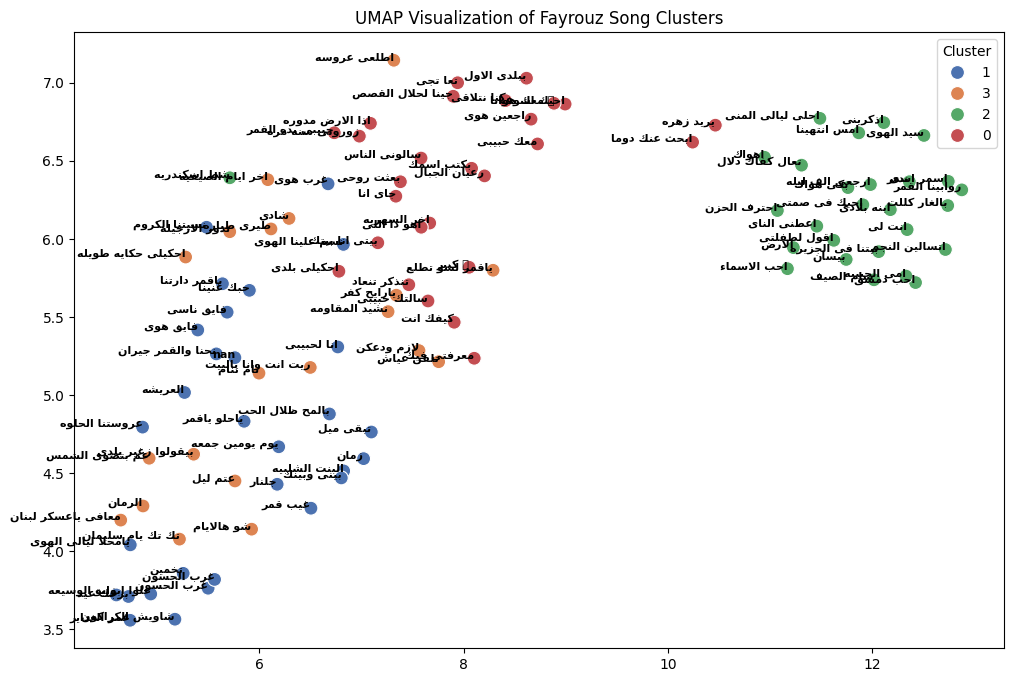

In [33]:
print("Visualizing clusters with UMAP...")

umap_embeddings = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=umap_embeddings[:, 0],
    y=umap_embeddings[:, 1],
    hue=data['Cluster'].astype(str),
    palette='deep',
    s=100
)

for i, title in enumerate(data['Track title']):
    title = str(title)
    display_title = title if len(title) <= 20 else title[:20] + '...'
    display_title = get_display(arabic_reshaper.reshape(display_title))
    plt.annotate(
        display_title,
        (umap_embeddings[i, 0], umap_embeddings[i, 1]),
        fontsize=8,
        fontweight='bold',
        ha='right'
    )

plt.title('UMAP Visualization of Fayrouz Song Clusters')
plt.savefig('umap_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


In [34]:
from transformers import pipeline
from deep_translator import GoogleTranslator
from tqdm import tqdm

emotion_classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=None
)

translator = GoogleTranslator(source='ar', target='en')

def analyze_emotions_translated(lyrics):
    """
    Translates Arabic lyrics to English and predicts the dominant emotion.
    Returns the emotion label or 'neutral' in case of error or empty input.
    """
    if not isinstance(lyrics, str) or not lyrics.strip():
        return 'neutral'

    try:
        translated = translator.translate(lyrics)

        translated = ' '.join(translated.split()[:512])

        emotions = emotion_classifier(translated)[0]

        return max(emotions, key=lambda x: x['score'])['label']

    except Exception as e:
        print(f"[Error] Emotion analysis failed: {e}")
        return 'neutral'

print("Analyzing emotions...")
tqdm.pandas()
data['Emotion'] = data['Tokenized & Preprocessed Lyrics'].progress_apply(analyze_emotions_translated)
print("Emotion analysis completed.")

Device set to use cpu


Analyzing emotions...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 104/104 [00:57<00:00,  1.80it/s]

Emotion analysis completed.


<ipython-input-35-5bacc0a38869>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotion', palette='muted')


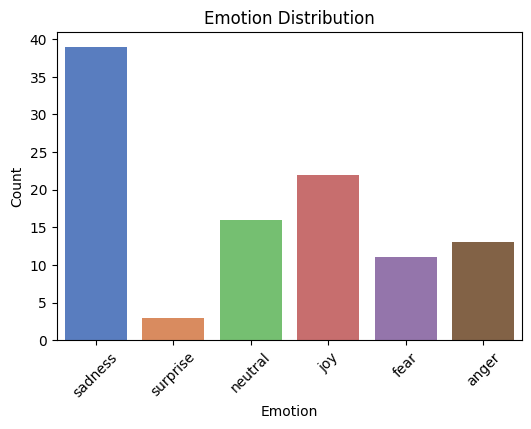

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Emotion', palette='muted')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

composer_texts = data.groupby('composer ')['Tokenized & Preprocessed Lyrics'] \
                     .apply(lambda lyrics: ' '.join(lyrics)) \
                     .reset_index()

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(composer_texts['Tokenized & Preprocessed Lyrics'])
terms = tfidf.get_feature_names_out()

top_n = 10

for row_idx, composer in enumerate(composer_texts['composer ']):
    scores = tfidf_matrix[row_idx].toarray().flatten()
    top_term_indices = scores.argsort()[-top_n:][::-1]
    top_terms = [terms[i] for i in top_term_indices]
    print(f"Most distinctive words for composer '{composer}': {top_terms}")

Most distinctive words for composer 'ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ': ['ÿ≠ÿ®Ÿäÿ®Ÿâ', 'ŸÅŸâ', 'ÿßŸÑŸáŸàŸâ', 'ÿπŸÖ', 'ÿ¥Ÿà', 'ÿßŸÜÿß', 'ÿßŸÑŸâ', 'ÿßŸÑŸÇŸÖÿ±', 'ÿ™ÿ∞ŸÉÿ±ŸàŸÜÿß', 'ÿßÿ∞ÿß']
Most distinctive words for composer 'ÿßŸÑŸäÿßÿ≥ ÿ±ÿ≠ÿ®ÿßŸÜŸâ': ['ŸÖÿπŸÉ', 'ÿßÿ®ŸÇŸâ', 'ÿ≠ÿ®Ÿäÿ®Ÿâ', 'Ÿàÿßÿ∫ÿßŸÜŸâ', 'ÿØÿ®ŸÑ', 'ÿÆŸÑÿµÿ™', 'ÿßŸÑŸÇÿµÿµ', 'ŸÇŸÖÿ±', 'ÿßŸÜÿß', 'ÿßŸÑÿ≥Ÿáÿ±']
Most distinctive words for composer 'ÿ®Ÿäÿ∫Ÿâ ŸÑŸâ': ['ÿ®ŸÉŸâ', 'ŸáŸàÿßŸÉ', 'ÿ≥ÿßÿπŸäÿ¥', 'ŸÖŸÉÿßŸÜ', 'ÿ¥ÿ±ŸàÿØŸâ', 'ŸäÿßÿµÿØŸäŸÇ', 'ŸÜÿ¥ŸäÿØŸâ', 'ŸàŸàÿ±ÿßÿ°', 'ŸáÿßŸÜŸâ', 'ŸáŸÜÿßÿ°']
Most distinctive words for composer 'ÿ™ÿ±ÿßÿ´': ['ŸÖÿ¨ÿ±Ÿàÿ≠Ÿà', 'ÿßŸÑÿ®ŸÜÿ™', 'ÿπŸäŸàŸÜÿß', 'ÿßŸÑÿ¥ŸÑÿ®ŸäŸá', 'ÿßŸÑÿÆŸàÿßÿ∑ÿ±', 'ÿπŸäŸÜŸäÿß', 'ÿπÿßŸÑÿ®ÿßŸÑ', 'ÿ®ÿ™ŸÑŸàÿ≠', 'ŸÖÿßŸáÿßŸÜ', 'ÿßŸÑŸÇŸÜÿßÿ∑ÿ±']
Most distinctive words for composer 'ÿ≠ŸÑŸäŸÖ ÿßŸÑÿ±ŸàŸÖŸâ': ['ÿßÿ¥ŸàŸÅ', 'ŸàŸÖŸáŸÖÿß', 'ŸÖŸÜŸÉ', 'ÿßÿ≠ÿ®ŸÉ', 'ÿ™ŸÇŸàŸÑ', 'ÿπŸÜŸÉ', 'ŸÅŸäŸÜ', 'ÿ≤ÿßÿØ', 'ŸàÿßŸÇŸàŸÑŸáÿß', 'ÿ≤ŸÖÿßŸÜŸÉ']
Most distinctive words for composer 'ÿ≤ŸÉŸâ ŸÜÿßÿµŸäŸÅ': ['

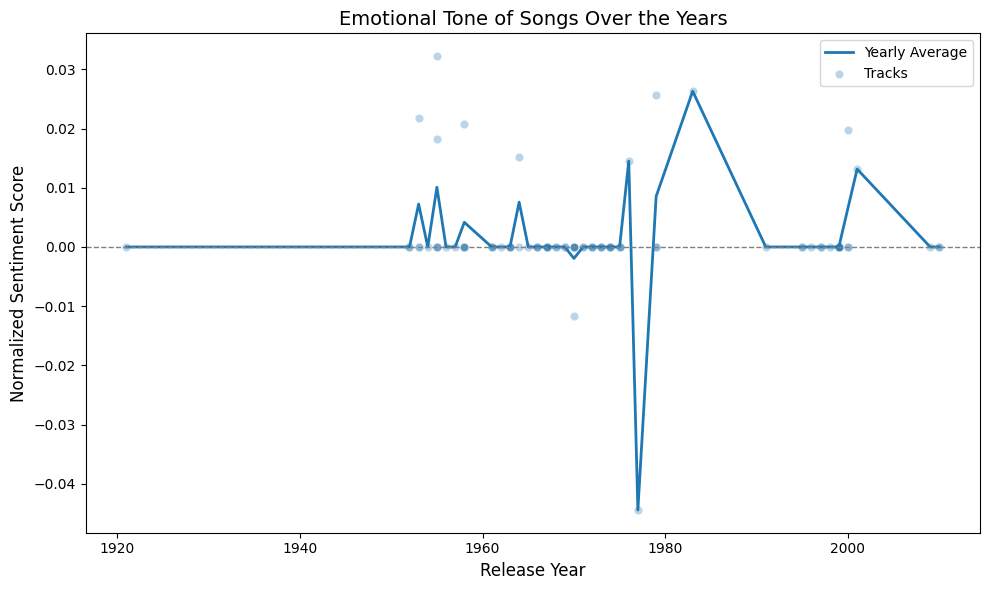

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_terms = ["ÿ≠ÿ®", "ŸÅÿ±ÿ≠", "ÿ¨ŸÖŸäŸÑ", "ÿ≥ÿπÿßÿØÿ©", "ÿ£ŸÖŸÑ", "ÿ≥ŸÑÿßŸÖ", "ÿ®Ÿáÿ¨ÿ©", "ÿ≠ŸÜÿßŸÜ"]
negative_terms = ["ÿ≠ÿ≤ŸÜ", "ÿ£ŸÑŸÖ", "ÿØŸÖŸàÿπ", "ŸÉÿ±Ÿá", "ÿÆŸàŸÅ", "ÿ∫ÿ∂ÿ®", "ÿ£ÿ≥Ÿâ", "Ÿäÿ£ÿ≥"]

def calculate_sentiment(text):
    tokens = text.split()
    if not tokens:
        return 0
    pos_hits = sum(word in positive_terms for word in tokens)
    neg_hits = sum(word in negative_terms for word in tokens)
    return (pos_hits - neg_hits) / len(tokens)

data['Sentiment Score'] = data['Tokenized & Preprocessed Lyrics'].apply(calculate_sentiment)

avg_sentiment_by_year = (
    data.groupby('Release Year')['Sentiment Score']
    .mean()
    .reset_index()
    .sort_values('Release Year')
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sentiment_by_year, x='Release Year', y='Sentiment Score', label='Yearly Average', linewidth=2)
sns.scatterplot(data=data, x='Release Year', y='Sentiment Score', alpha=0.3, label='Tracks')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Emotional Tone of Songs Over the Years', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Normalized Sentiment Score', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

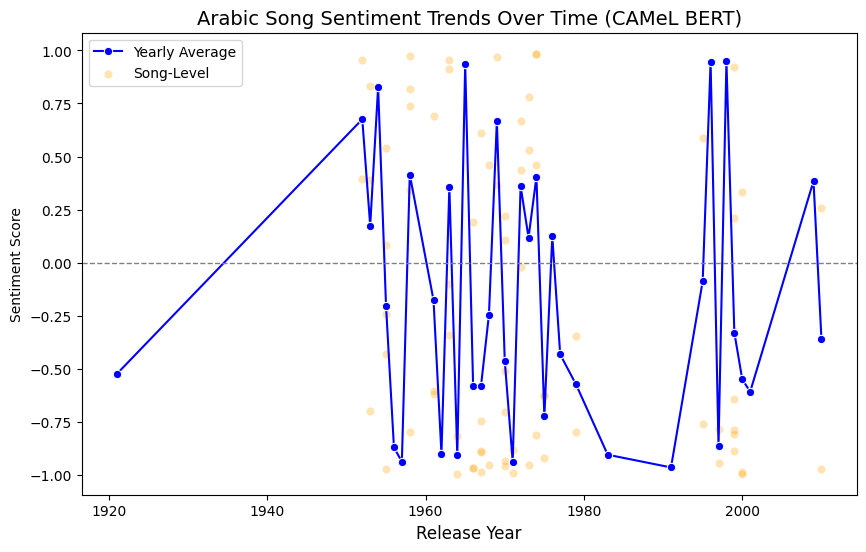

In [38]:
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

try:
    camel_sentiment = pipeline(
        task="sentiment-analysis",
        model="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment",
        tokenizer="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment",
        return_all_scores=True
    )
except Exception as err:
    print("Model loading failed. Ensure required libraries are installed.")
    print(f"Error details: {err}")
    raise

def extract_sentiment(text):
    if not isinstance(text, str) or text.strip() == '':
        return 0

    try:
        scores = camel_sentiment(text)[0]
        sentiment_value = 0

        for entry in scores:
            if entry['label'] == 'positive':
                sentiment_value += entry['score']
            elif entry['label'] == 'negative':
                sentiment_value -= entry['score']
        return sentiment_value  # Range: roughly -1 (negative) to +1 (positive)

    except Exception as e:
        print(f"Error scoring sentiment: {e}")
        return 0

data['Sentiment Score'] = data['Tokenized & Preprocessed Lyrics'].apply(extract_sentiment)

trend_by_year = (
    data.groupby('Release Year')['Sentiment Score']
    .mean()
    .reset_index()
    .sort_values('Release Year')
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_by_year, x='Release Year', y='Sentiment Score', label='Yearly Average', color='blue', marker='o')
sns.scatterplot(data=data, x='Release Year', y='Sentiment Score', alpha=0.3, label='Song-Level', color='orange')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('Arabic Song Sentiment Trends Over Time (CAMeL BERT)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel

In [39]:
print("Loading dataset:/content/fayrouz_lyrics_with_sentiment.csv")
try:
    data = pd.read_csv('/content/fayrouz_lyrics_with_sentiment.csv')
    print(f"Dataset loaded successfully. Total songs: {len(data)}")
except FileNotFoundError:
    print("Error: Dataset file '/content/fayrouz_lyrics_with_sentiment.csv' not found.")
    raise

Loading dataset:/content/fayrouz_lyrics_with_sentiment.csv
Dataset loaded successfully. Total songs: 104


In [40]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['Sentiment_Numeric'] = data['Sentiment'].map(sentiment_mapping)

avg_sentiment = (
    data.groupby(['Lyricist', 'composer '])['Sentiment_Numeric']
    .mean()
    .reset_index()
    .sort_values(by='Sentiment_Numeric', ascending=False) # Sort by the new numeric column
)

print(avg_sentiment.head())

avg_sentiment.to_csv('lyricist_composer_sentiment_average.csv', index=False)

            Lyricist    composer   Sentiment_Numeric
0        ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸä  ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸâ                1.0
7     ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä  ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸâ                1.0
15         ÿ≤ŸÉŸä ŸÜÿßÿµŸäŸÅ    ÿ≤ŸÉŸâ ŸÜÿßÿµŸäŸÅ                1.0
13  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ    ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥                1.0
11              ÿ™ÿ±ÿßÿ´         ÿ™ÿ±ÿßÿ´                1.0


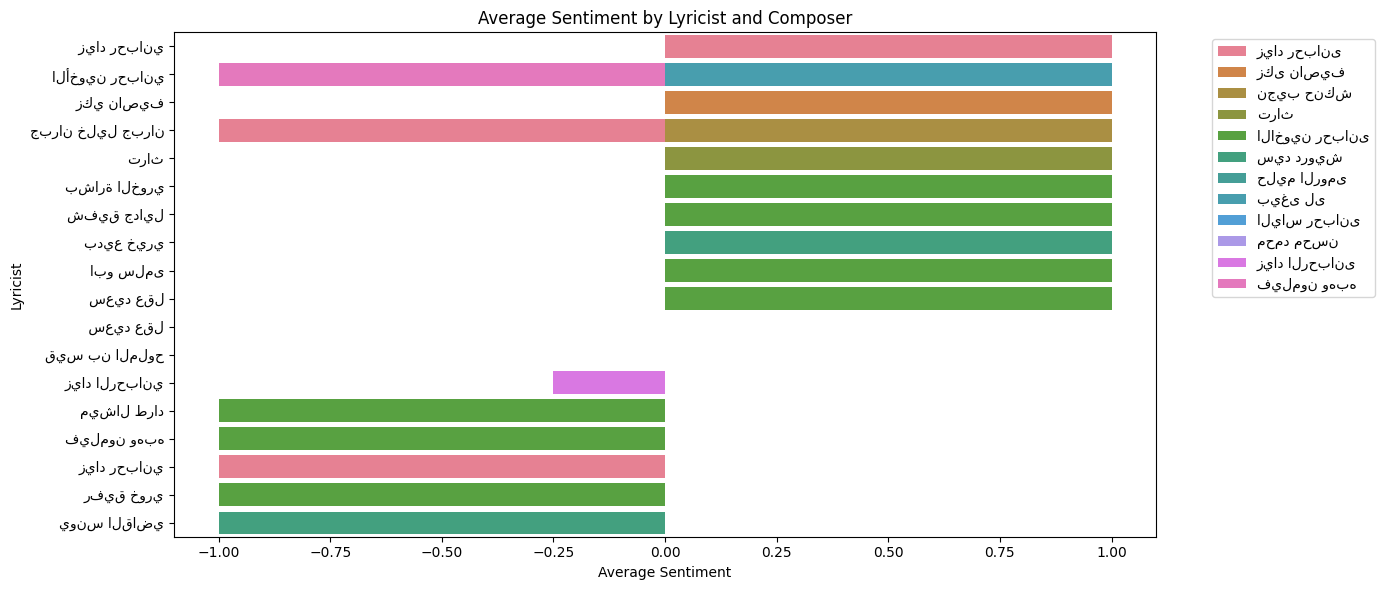

In [41]:
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_sentiment, x='Sentiment_Numeric', y='Lyricist', hue='composer ', dodge=False)
plt.title('Average Sentiment by Lyricist and Composer')
plt.xlabel('Average Sentiment')
plt.ylabel('Lyricist')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


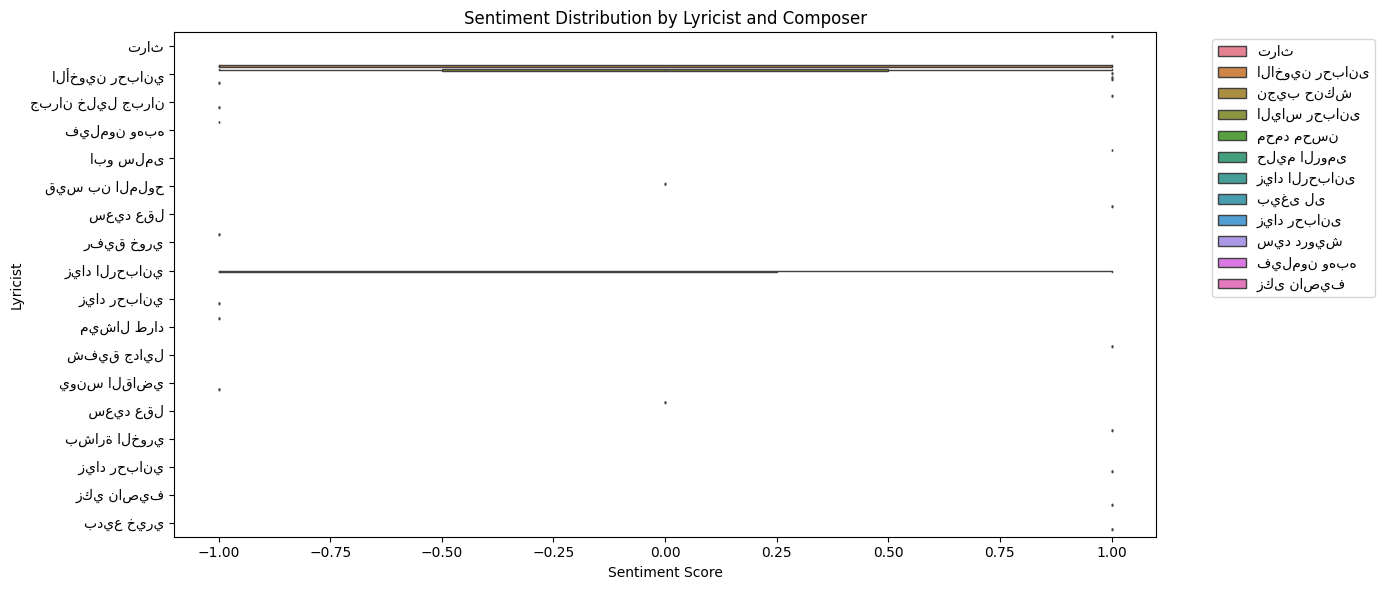

In [42]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Sentiment_Numeric', y='Lyricist', hue='composer ')
plt.title('Sentiment Distribution by Lyricist and Composer')
plt.xlabel('Sentiment Score')
plt.ylabel('Lyricist')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

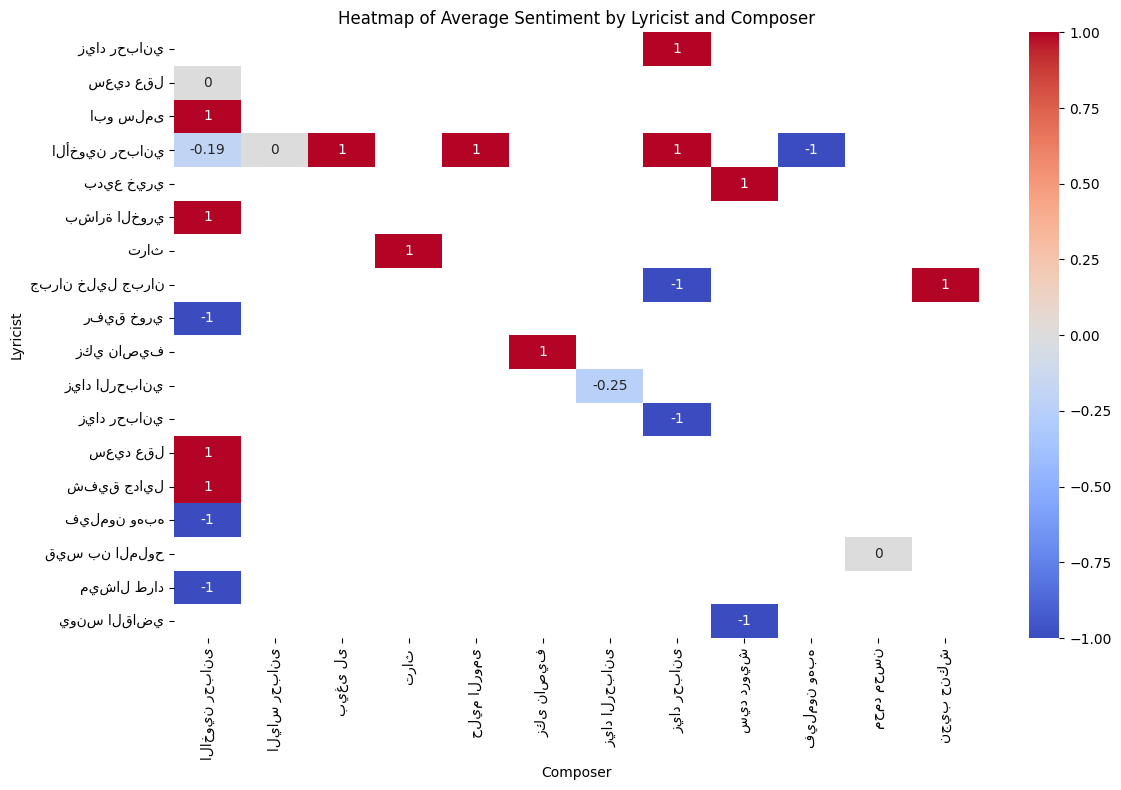

In [43]:
pivot_table = data.pivot_table(index='Lyricist', columns='composer ', values='Sentiment_Numeric', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Average Sentiment by Lyricist and Composer')
plt.xlabel('Composer')
plt.ylabel('Lyricist')
plt.tight_layout()
plt.show()

In [44]:
summary_stats = data.groupby(['Lyricist', 'composer '])['Sentiment_Numeric'].describe()
print(summary_stats)

                                 count      mean       std  min  25%  50%  \
Lyricist         composer                                                   
 ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸä     ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸâ       1.0  1.000000       NaN  1.0  1.0  1.0   
 ÿ≥ÿπŸäÿØ ÿπŸÇŸÑ        ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    1.0  0.000000       NaN  0.0  0.0  0.0   
ÿßÿ®Ÿà ÿ≥ŸÑŸÖŸâ         ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    1.0  1.000000       NaN  1.0  1.0  1.0   
ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä   ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ   69.0 -0.188406  0.959095 -1.0 -1.0 -1.0   
                 ÿßŸÑŸäÿßÿ≥ ÿ±ÿ≠ÿ®ÿßŸÜŸâ      2.0  0.000000  1.414214 -1.0 -0.5  0.0   
                 ÿ®Ÿäÿ∫Ÿâ ŸÑŸâ           1.0  1.000000       NaN  1.0  1.0  1.0   
                 ÿ≠ŸÑŸäŸÖ ÿßŸÑÿ±ŸàŸÖŸâ       1.0  1.000000       NaN  1.0  1.0  1.0   
                 ÿ≤ŸäÿßÿØ ÿ±ÿ≠ÿ®ÿßŸÜŸâ       1.0  1.000000       NaN  1.0  1.0  1.0   
                 ŸÅŸäŸÑŸÖŸàŸÜ ŸàŸáÿ®Ÿá       1.0 -1.000000       NaN -1.0 -1.0 -1.0   
ÿ®ÿØŸäÿπ ÿÆŸäÿ±Ÿä   

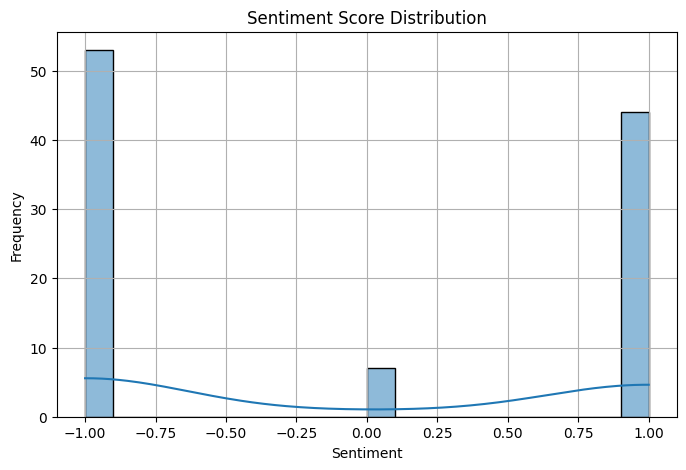

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data['Sentiment_Numeric'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

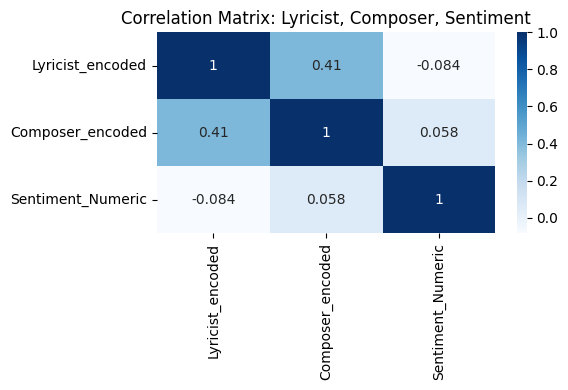

In [46]:
from sklearn.preprocessing import LabelEncoder

df_corr = data[['Lyricist', 'composer ', 'Sentiment_Numeric']].copy()
df_corr['Lyricist_encoded'] = LabelEncoder().fit_transform(df_corr['Lyricist'].astype(str))
df_corr['Composer_encoded'] = LabelEncoder().fit_transform(df_corr['composer '].astype(str))

correlation = df_corr[['Lyricist_encoded', 'Composer_encoded', 'Sentiment_Numeric']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix: Lyricist, Composer, Sentiment')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
X = data['track lyrics']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.56      0.82      0.67        11
     neutral       0.00      0.00      0.00         1
    positive       0.60      0.33      0.43         9

    accuracy                           0.57        21
   macro avg       0.39      0.38      0.37        21
weighted avg       0.55      0.57      0.53        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [51]:
data.head()

Track title                                       track lyrics  \
0     ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá  ÿßŸÑÿ®ŸÜÿ™ ÿßŸÑÿ¥ŸÑÿ®ŸäŸá ÿπŸäŸàŸÜÿß ŸÑŸàÿ≤ŸäŸá ÿ®ÿ≠ÿ®ŸÉ ŸÇŸÑÿ®Ÿâ ŸäÿßŸÇŸÑÿ®Ÿâ ÿßŸÜÿ™...   
1  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá  ÿßÿÆÿ± ÿßŸäÿßŸÖ ÿßŸÑÿµŸäŸÅŸäŸá ŸàÿßŸÑÿµÿ®ŸäŸá ÿ¥ŸàŸâ ÿ¥ŸàŸâ ŸàÿµŸÑÿ™ ÿ≥ÿßÿ≠Ÿá ŸÖŸäÿ≥...   
2       ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ  ÿßÿπÿ∑ŸÜŸâ ÿßŸÑŸÜÿßŸâ Ÿàÿ∫ŸÜ ŸÅÿßŸÑÿ∫ŸÜÿß ÿ≥ÿ± ÿßŸÑŸàÿ¨ŸàÿØ ŸàÿßŸÜŸäŸÜ ÿßŸÑŸÜÿßŸâ Ÿä...   
3        ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ  ÿßŸÜÿß ŸÑÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑŸâ ÿπÿµŸÅŸàÿ±Ÿá ÿ®Ÿäÿ∂ÿß ÿ®ŸÇŸâ ÿ™ÿ≥ÿßŸÑŸâ Ÿäÿπÿ™...   
4         ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ  ÿ®ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸÉ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÑÿ≠Ÿàÿ± ÿßŸÑÿπÿ™ŸäŸÇ ÿ®ÿ™ŸÉÿ™ÿ® ÿßÿ≥ŸÖŸâ ÿ≠ÿ®Ÿäÿ®...   

   Release Year       composer           Lyricist  \
0        2009.0            ÿ™ÿ±ÿßÿ´              ÿ™ÿ±ÿßÿ´   
1        1975.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä   
2        1973.0       ŸÜÿ¨Ÿäÿ® ÿ≠ŸÜŸÉÿ¥  ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ   
3        1965.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä   
4        1961.0  ÿßŸÑÿßÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸâ    ÿßŸÑÿ£ÿÆŸàŸäŸÜ ÿ±ÿ≠ÿ®ÿßŸÜŸä   

                     Tokenized & Preprocessed Lyrics Sentiment  \
0  ÿßŸÑÿ®ŸÜÿ™\nÿßŸÑÿ¥ŸÑÿ®ŸäŸá\nÿπŸäŸàŸÜÿß\nŸÑŸàÿ≤ŸäŸá\nÿ®ÿ≠ÿ®ŸÉ\nŸÇŸÑÿ®Ÿâ\nŸäÿßŸÇŸÑ...  positive   
1  ÿßÿÆÿ±\nÿßŸäÿßŸÖ\nÿßŸÑÿµŸäŸÅŸäŸá\nŸàÿßŸÑÿµÿ®ŸäŸá\nÿ¥ŸàŸâ\nÿ¥ŸàŸâ\nŸàÿµŸÑÿ™\nÿ≥...  negative   
2  ÿßÿπÿ∑ŸÜŸâ\nÿßŸÑŸÜÿßŸâ\nŸàÿ∫ŸÜ\nŸÅÿßŸÑÿ∫ŸÜÿß\nÿ≥ÿ±\nÿßŸÑŸàÿ¨ŸàÿØ\nŸàÿßŸÜŸäŸÜ\n...  positive   
3  ÿßŸÜÿß\nŸÑÿ≠ÿ®Ÿäÿ®Ÿâ\nÿ≠ÿ®Ÿäÿ®Ÿâ\nÿßŸÑŸâ\nÿπÿµŸÅŸàÿ±Ÿá\nÿ®Ÿäÿ∂ÿß\nÿ®ŸÇŸâ\nÿ™ÿ≥...  positive   
4  ÿ®ŸÉÿ™ÿ®\nÿßÿ≥ŸÖŸÉ\nŸäÿßÿ≠ÿ®Ÿäÿ®Ÿâ\nÿßŸÑÿ≠Ÿàÿ±\nÿßŸÑÿπÿ™ŸäŸÇ\nÿ®ÿ™ŸÉÿ™ÿ®\nÿßÿ≥ŸÖ...  negative   

   Sentiment_Score  Emotion  Sentiment_Numeric  
0         0.648196     love                  1  
1         0.940842     love                 -1  
2         0.591466  longing                  1  
3         0.953652     love                  1  
4         0.709413     love                 -1

In [52]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

MODEL_NAME = "aubmindlab/aragpt2-base"
CACHE_DIR = "./custom_cache"

tokenizer = GPT2Tokenizer.from_pretrained(MODEL_NAME, cache_dir=CACHE_DIR)
model = GPT2LMHeadModel.from_pretrained(MODEL_NAME, cache_dir=CACHE_DIR)

tokenizer.pad_token = tokenizer.eos_token

In [53]:
from transformers import TextDataset, DataCollatorForLanguageModeling

def save_lyrics_to_file(df, text_column: str, output_path: str) -> None:
    """Save lyrics from a DataFrame column to a text file, separated by double newlines."""
    with open(output_path, 'w', encoding='utf-8') as f:
        for lyrics in df[text_column]:
            if isinstance(lyrics, str) and lyrics.strip():
                f.write(lyrics.strip() + "\n\n")

def create_language_model_dataset(tokenizer, file_path: str, block_size: int = 128) -> TextDataset:
    """Create a TextDataset for language model fine-tuning."""
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )

def get_data_collator(tokenizer) -> DataCollatorForLanguageModeling:
    """Return a data collator for language modeling without masking (GPT-style)."""
    return DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False
    )

OUTPUT_FILE = "fayrouz_lyrics.txt"
TEXT_COLUMN = "track lyrics"

save_lyrics_to_file(data, TEXT_COLUMN, OUTPUT_FILE)

train_dataset = create_language_model_dataset(tokenizer, OUTPUT_FILE)
data_collator = get_data_collator(tokenizer)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [54]:
import logging
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def verify_training_inputs():
    logger.info("Verifying model, dataset, and data collator...")
    required_vars = ['model', 'train_dataset', 'data_collator']
    missing = [var for var in required_vars if var not in globals()]
    if missing:
        logger.error(f"Missing required variables: {', '.join(missing)}")
        raise ValueError("Ensure model, dataset, and data collator are initialized before training.")

def prepare_dataloader(dataset, collator, batch_size):
    logger.info("Preparing DataLoader...")
    return DataLoader(dataset, batch_size=batch_size, collate_fn=collator, shuffle=True)

def setup_optimizer_scheduler(model, dataloader_len, num_epochs, learning_rate, accumulation_steps):
    logger.info("Setting up optimizer and scheduler...")
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    total_steps = dataloader_len * num_epochs // accumulation_steps
    scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    return optimizer, scheduler

def train_model(model, dataloader, optimizer, scheduler, device, epochs, accumulation_steps):
    logger.info(f"Using device: {device}")
    model.to(device)
    model.train()

    total_steps = 0
    for epoch in range(epochs):
        logger.info(f"Epoch {epoch + 1}/{epochs}")
        for step, batch in enumerate(dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss / accumulation_steps
            loss.backward()

            if (step + 1) % accumulation_steps == 0:
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                total_steps += 1
                if total_steps % 10 == 0:
                    logger.info(f"Step {total_steps}, Loss: {loss.item() * accumulation_steps:.4f}")
        logger.info(f"Completed epoch {epoch + 1}, Last batch loss: {loss.item() * accumulation_steps:.4f}")

def save_finetuned_model(model, tokenizer, output_path):
    logger.info("Saving fine-tuned model and tokenizer...")
    try:
        model.save_pretrained(output_path)
        tokenizer.save_pretrained(output_path)
        logger.info("Model and tokenizer saved successfully!")
    except Exception as e:
        logger.error(f"Failed to save model/tokenizer: {e}")
        raise

verify_training_inputs()

logger.info(f"Dataset size: {len(train_dataset)} samples")

NUM_EPOCHS = 3
BATCH_SIZE = 4
ACCUM_STEPS = 2
LEARNING_RATE = 5e-5
OUTPUT_DIR = "./fayrouz_aragpt2"

train_loader = prepare_dataloader(train_dataset, data_collator, BATCH_SIZE)
optimizer, scheduler = setup_optimizer_scheduler(model, len(train_loader), NUM_EPOCHS, LEARNING_RATE, ACCUM_STEPS)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_model(model, train_loader, optimizer, scheduler, DEVICE, NUM_EPOCHS, ACCUM_STEPS)

save_finetuned_model(model, tokenizer, OUTPUT_DIR)

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


In [56]:
import logging
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

NUM_EPOCHS = 5
BATCH_SIZE = 4
GRAD_ACCUM_STEPS = 2
LEARNING_RATE = 2e-5
WEIGHT_DECAY = 0.01
MAX_GRAD_NORM = 1.0
WARMUP_STEPS = 100
OUTPUT_DIR = "./fayrouz_aragpt2"

def validate_environment():
    logger.info("Validating training environment...")
    required = ['model', 'train_dataset', 'data_collator']
    missing = [v for v in required if v not in globals()]
    if missing:
        logger.error(f"Missing: {', '.join(missing)}. Please run setup cells first.")
        raise ValueError("Missing required variables for training.")

def prepare_dataloader(dataset, collator):
    logger.info("Creating DataLoader...")
    return DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=collator, shuffle=True)

def prepare_optimizer_scheduler(model, dataloader_length):
    logger.info("Setting up optimizer and learning rate scheduler...")
    optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    total_steps = dataloader_length * NUM_EPOCHS // GRAD_ACCUM_STEPS
    scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=WARMUP_STEPS,
        num_training_steps=total_steps
    )
    return optimizer, scheduler

def train(model, tokenizer, dataloader, optimizer, scheduler, device):
    logger.info(f"Training on device: {device}")
    model.to(device)
    model.train()

    total_steps = 0
    for epoch in range(NUM_EPOCHS):
        logger.info(f"Epoch {epoch + 1}/{NUM_EPOCHS}")
        total_loss = 0

        for step, batch in enumerate(dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            if 'attention_mask' not in batch:
                batch['attention_mask'] = (batch['input_ids'] != tokenizer.pad_token_id).long()

            outputs = model(**batch)
            loss = outputs.loss / GRAD_ACCUM_STEPS
            total_loss += loss.item()
            loss.backward()

            if (step + 1) % GRAD_ACCUM_STEPS == 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), MAX_GRAD_NORM)
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                total_steps += 1

                if total_steps % 10 == 0:
                    logger.info(f"Step {total_steps}, Loss: {loss.item() * GRAD_ACCUM_STEPS:.4f}")

        avg_epoch_loss = total_loss / len(dataloader)
        logger.info(f"Epoch {epoch + 1} completed, Average Loss: {avg_epoch_loss:.4f}")

def save_model_and_tokenizer(model, tokenizer, output_path):
    logger.info("Saving fine-tuned model and tokenizer...")
    try:
        model.save_pretrained(output_path)
        tokenizer.save_pretrained(output_path)
        logger.info("Model and tokenizer saved successfully.")
    except Exception as e:
        logger.error(f"Error saving model/tokenizer: {e}")
        raise

def run_fine_tuning():
    validate_environment()
    logger.info(f"Training set size: {len(train_dataset)} samples")

    dataloader = prepare_dataloader(train_dataset, data_collator)
    optimizer, scheduler = prepare_optimizer_scheduler(model, len(dataloader))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train(model, tokenizer, dataloader, optimizer, scheduler, device)
    save_model_and_tokenizer(model, tokenizer, OUTPUT_DIR)

run_fine_tuning()

In [60]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

model_path = "./fayrouz_aragpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
model = GPT2LMHeadModel.from_pretrained(model_path)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def generate_lyrics(prompt, max_length=100, num_return_sequences=1, temperature=1.0, top_k=50, top_p=0.95):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )
    return [tokenizer.decode(g, skip_special_tokens=True) for g in output]

# Example 2
prompt = "ŸÉÿßŸÜ ÿπŸÜÿß ÿ∑ÿßÿ≠ŸàŸÜ"
generated = generate_lyrics(prompt, max_length=150)
print("\n".join(generated))

ŸÉÿßŸÜ ÿπŸÜÿß ÿ∑ÿßÿ≠ŸàŸÜ ÿ∑ÿßÿ≠Ÿàÿß ŸÅŸä ÿÆŸÑŸÜÿß ŸÖŸÑŸÑŸÜÿßŸÜÿß ÿ®ÿ∏ŸÑŸÜÿß ÿ∑ŸÑŸàÿß ÿπŸÜÿß ÿ±ÿ≠ŸÜÿß ÿ®ÿ™ŸÖŸÜŸâ ÿπŸÖŸäŸÜÿß ÿ™ÿßÿÆÿ± ŸÅŸäŸÜÿß ŸÜÿ∂ŸÑ ŸÖŸÜÿß ÿ±ÿ≠ŸÜÿß ÿ±ÿ¨ÿπŸÜÿß ÿ≠ŸÜŸâ ÿ®ÿπÿßÿØŸÜÿß ÿ¨ÿ®ÿ™ŸÜÿß ŸÉÿ™Ÿäÿ± ÿ±ÿ≠ŸÜÿßŸáÿß ÿ®ÿ™ÿπŸàÿØŸÜÿß ÿ®ŸÇŸÑŸáÿß Ÿáÿ≥Ÿâ ŸÖÿ¥ ÿØÿßŸäŸÖÿß ÿ®ŸÜÿ™Ÿâ ÿ®ÿ≥ŸÖÿπŸÉ ÿ®ÿ™ŸÖŸÜŸÑŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ ŸÜÿßŸÉŸÑ ÿπŸÜÿ® ÿ®ÿ™ÿ≠ÿ®Ÿáÿß ÿ±ÿ≠ŸÜÿß ÿπŸÖ ÿ™ÿ∂ŸÑŸÜÿß ÿπŸÇÿ®ÿßŸÑ ŸáÿßŸÑŸàŸÑÿπ ŸÅŸâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ ŸÉÿ™Ÿäÿ± ÿßÿ≠ŸÉŸâ ÿπ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ®ÿ≠ÿ®ŸÉŸâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ®ÿ≠ÿ®ŸÉŸâ ÿ®ÿ™ŸÖŸÜŸâ ÿ±ÿ≠Ÿàÿß ÿ≠ÿ®Ÿäÿ®Ÿâ Ÿàÿ®ŸÇŸàŸÑ ÿ≠ÿ®ŸÉ ŸÇŸÑÿ®Ÿâ ÿ±ÿßÿ≠ÿ™Ÿâ ÿπŸÑŸÑŸâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®ŸÉ Ÿàÿ≠ŸÉŸâ ÿπŸÜŸÉŸâ ÿßŸÜÿß ÿ≠ÿ®ŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ Ÿàÿπÿ∑ÿ±ŸÜŸâ ÿ≠ÿ®Ÿäÿ®Ÿâ ŸàÿßŸÜÿß ÿßÿ≠ÿ®ŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿßŸÜÿß ÿπŸÖ ÿ®ÿ™ŸÇŸàŸÑ ÿ®ÿ≠ÿ®ŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ ÿ≠ÿ®Ÿäÿ®Ÿâ Ÿàÿ®ÿ≠ÿ®ŸÉ ÿ≠ÿ®Ÿäÿ®Ÿâ


In [61]:
# Example 2
prompt = "ÿ±ÿ¨ÿπÿ™ ÿßŸÑÿ¥ÿ™ŸàŸäÿ©"
generated = generate_lyrics(prompt, max_length=150)
print("\n".join(generated))

ÿ±ÿ¨ÿπÿ™ ÿßŸÑÿ¥ÿ™ŸàŸäÿ© ÿ®ÿ≥ÿß ŸÖÿß ÿ±ÿßÿ≠ ÿ±ÿßÿ≠ÿß ÿßŸÑÿµŸäŸÅ ÿµÿßÿ± Ÿäÿ®ÿØÿß ÿπÿßŸÑÿ±ÿØ ŸáŸàÿßŸÉ ŸÇÿπÿØŸÜÿß ÿ±ÿ≠ŸÜÿß ÿ¥Ÿà ÿ®ÿØŸÜÿß ÿ®ÿ≥ŸÜÿ≠ŸÜÿß ŸáŸÑŸÇ ÿπŸÖ ŸÜÿßÿ∑ÿ±ŸÜÿß ÿ®ÿØŸÜÿß ŸÜÿ≥Ÿáÿ± ÿßŸÑÿµŸäŸÅ ÿ®ÿ≥ ÿπŸÜÿß ÿ¥Ÿâ ÿ±ÿ≠ŸÜÿß ÿ∂ŸàŸâ ÿπŸÜÿß ÿ¥Ÿà ÿπŸÖ ÿ±ÿ≠ ŸÜÿ∂ÿ≠ŸÉ ŸÉÿ™Ÿäÿ± ŸáŸàŸÜ ŸáŸÜŸäŸÜÿß ŸäŸàÿß ÿπÿßŸÑÿπŸÜÿØŸÜÿß ÿ®ÿØŸÜÿß ÿπÿßŸÑÿ∫ŸÜŸä ŸäŸÑŸÑŸâ ŸÉÿ™Ÿäÿ± ÿπŸÜÿß ŸáŸÑŸÇ ÿπÿß ÿπŸÖ ŸÜÿ∂ŸÑ ÿπŸÜÿß ŸÜÿ≠ŸÉŸä ÿ≠ŸÉÿßŸäÿß ÿ≠ŸÉÿßŸÉ ÿ®ÿπÿ∑ÿ± ÿßŸÑŸáŸàŸâ ÿπŸÖ ÿ®ŸäŸÇŸÑŸÉ ÿ±ÿ≠ ŸÜÿ®ŸÇŸâ ŸÖÿ™ŸÑ ŸÉŸÑ ŸÑŸäŸÑŸá ÿπŸÖ ŸÜÿ≠ŸÜÿß ÿßŸÜÿß ÿ¥Ÿà ŸÖÿ¥ÿßŸÜÿß ÿ®ÿØŸÉ ÿ≠ÿØÿß ÿ®ÿØŸÉ ÿ±ÿ≠ ŸÜÿ±ÿ¨ÿπ ÿ®ÿØŸâ ÿπÿßŸÑŸÅÿßÿ∂Ÿä ÿπŸÜÿß ÿ™ÿßŸÉŸÑŸÜÿß ÿ®ÿ≥ŸÉŸâ ÿ®ŸÑŸÑŸâ ÿ∫ŸÜÿ™ ÿ≠ŸÉŸäŸÜÿß ÿßŸÑŸáŸàŸâ ÿπÿßŸÑÿßŸÇŸÖÿ± ÿ®ÿ™ÿ®ŸÇŸâ ÿ®ÿ≥ ÿπŸÖ ÿ™ŸÇÿ∂ŸÑŸà ÿπŸÖ ÿ®ŸäŸÇŸÑŸâ ÿ®ŸÇŸÑŸÉ ÿßŸÜŸà ÿπŸÖ ÿ™ŸÇÿ∂
